In [3]:
import numpy as np
from itertools import chain
import matplotlib.pyplot as plt


def read_input(fname):
    with open(fname) as file:
        return np.array([list(x.strip()) for x in file.readlines()])


def find_reachable_points(x):
    reachable_plots = {}
    height = x.shape[0]
    width = x.shape[1]
    for i in range(height):
        for j in range(width):
            point = (i, j)
            reachable_plots[point] = []
            # up
            if i > 0 and x[i-1, j] in ".S":
                reachable_plots[point].append((i-1, j))
            # down
            if i < height - 1 and x[i+1, j] in ".S":
                reachable_plots[point].append((i+1, j))
            # left
            if j > 0 and x[i, j-1] in ".S":
                reachable_plots[point].append((i, j-1))
            # right
            if j < width - 1 and x[i, j+1] in ".S":
                reachable_plots[point].append((i, j+1))
    return reachable_plots


def part_1(x, n_steps):
    reachable_plots = find_reachable_points(x)
    start = np.where(x == "S")
    current = set([(start[0][0], start[1][0])])
    for step in range(n_steps):
        current = set(chain(*(reachable_plots[point] for point in current)))
    return len(current)


def find_reachable_points2(x):
    reachable_plots = {}
    height = x.shape[0]
    width = x.shape[1]
    for i in range(height):
        for j in range(width):
            point = (0, 0, i, j)
            reachable_plots[point] = []
            # up
            if i > 0 and x[i-1, j] in ".S":
                reachable_plots[point].append((0, 0, i-1, j))
            elif i == 0 and x[-1, j] in ".S":
                reachable_plots[point].append((-1, 0, height-1, j))
            # down
            if i < height - 1 and x[i+1, j] in ".S":
                reachable_plots[point].append((0, 0, i+1, j))
            elif i == height - 1 and x[0, j] in ".S":
                reachable_plots[point].append((1, 0, 0, j))
            # left
            if j > 0 and x[i, j-1] in ".S":
                reachable_plots[point].append((0, 0, i, j-1))
            elif j == 0 and x[i, -1] in ".S":
                reachable_plots[point].append((0, -1, i, width-1))
            # right
            if j < width - 1 and x[i, j+1] in ".S":
                reachable_plots[point].append((0, 0, i, j+1))
            elif j == width - 1 and x[i, 0] in ".S":
                reachable_plots[point].append((0, 1, i, 0))
    return reachable_plots


def get_reachable_points(point, reachable_points):
    map_y, map_x, y, x = point
    next_points = reachable_points[(0, 0, y, x)]
    return [(map_y+map_dy, map_x+map_dx, y, x) for map_dy, map_dx, y, x
            in next_points]


def part_2(x, n_steps):
    reachable_plots = find_reachable_points2(x)
    start = np.where(x == "S")
    current = set([(0, 0, start[0][0], start[1][0])])
    steps = []
    values = []
    for step in range(n_steps):
        current = set(
            chain(*(get_reachable_points(point, reachable_plots)
                    for point in current))
        )
        steps.append(step)
        values.append(len(current))
    return steps, values

In [15]:
steps, values = part_2(read_input("test.txt"), 500)

In [16]:
steps = np.array(steps)
values = np.array(values)

In [18]:
import pandas as pd

df = pd.DataFrame({"steps": steps, "values": values})
df.to_csv("test_output.csv", index=False)

In [7]:
step_delta = steps[1:]
value_divide = values[1:] / values[:-1]
value_subtract = values[1:] - values[:-1]

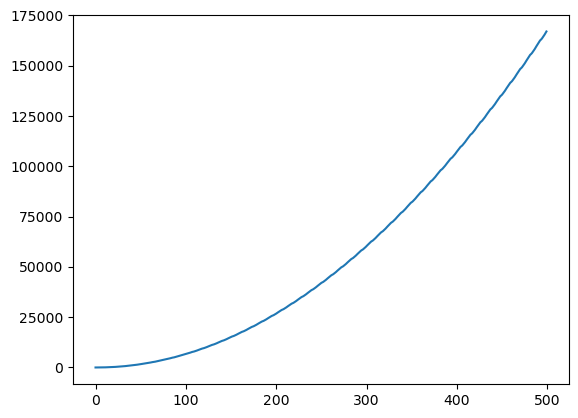

In [8]:
plt.plot(steps, values)
plt.show()

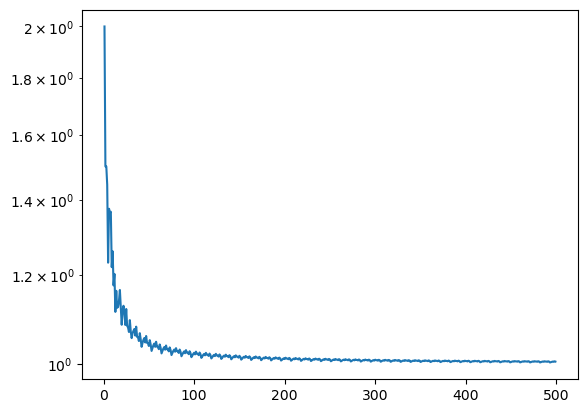

In [9]:
plt.plot(step_delta, value_divide)
plt.yscale("log")
plt.show()

In [10]:
width = 131

steps = np.arange(65, 500, 131)
steps

array([ 65, 196, 327, 458])

In [9]:
values[steps]

array([  3870,  33452,  92196, 180102])

In [39]:
X = np.arange(64, 500, 131)
y = values[X]

In [40]:
(26501365 - 65) / 131

202300.0

In [41]:
p = np.poly1d(np.polyfit(X, y, 2))

In [42]:
p(26501365)

596734669303466.2

In [34]:
X = np.array([0, 1, 2, 3])
y = values[np.arange(64, 500, 131)][:]
p = np.poly1d(np.polyfit(X, y, 2))
p(202300)

596734624269209.5